In [1]:
import pickle

import numpy as np
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/gagan/miniconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [19]:
train_file_path = 'data/big.txt'

In [3]:
accepted_chars = 'abcdefghijklmnopqrstuvwxyz '
len_accepted_chars = len(accepted_chars)

In [4]:
char_to_idx = {c: idx for idx, c in enumerate(accepted_chars)}; char_to_idx

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 ' ': 26}

In [5]:
def clean_and_tokenize(text):
    return [char.lower() for char in text if char.lower() in accepted_chars]

In [6]:
clean_and_tokenize("this should be?")

['t', 'h', 'i', 's', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'b', 'e']

In [7]:
def ngram(n, txt):
    tokenized_txt = clean_and_tokenize(txt)
    for idx in range(len(tokenized_txt)-n+1):
        yield tokenized_txt[idx:idx+n]

In [8]:
ngram(2, "hello")

<generator object ngram at 0x7fa9bf0f9250>

In [9]:
probabilites = np.ones((27,27))*10; probabilites

array([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10.],
       [10., 10., 10., 10., 10., 10., 10

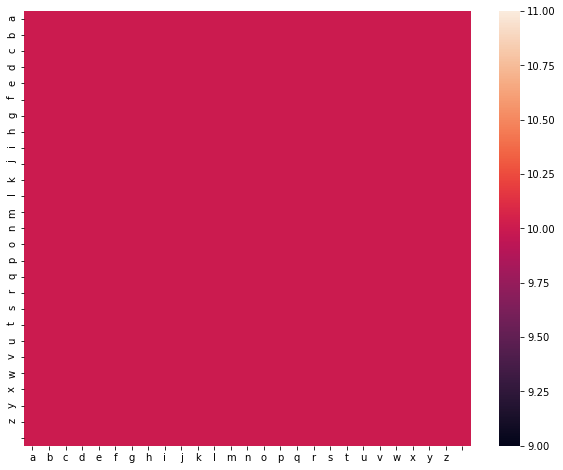

In [10]:
plt.subplots(figsize=(10,8))
sns.heatmap(probabilites, xticklabels=char_to_idx.keys(), yticklabels=char_to_idx.keys())

In [11]:
len(probabilites) == len(char_to_idx)

# if they don't match then something is wrong

True

In [12]:
for line in tqdm(open(train_file_path, 'r')):
    for fc, sc in ngram(2, line):
        probabilites[char_to_idx[fc]][char_to_idx[sc]] += 1

45542it [00:03, 12031.93it/s]


In [13]:
# let's look at some probabilies

print(f"Probability of ab = {probabilites[char_to_idx['a']][char_to_idx['b']]}")
print(f"Probability of aa = {probabilites[char_to_idx['a']][char_to_idx['a']]}")

Probability of ab = 3602.0
Probability of aa = 44.0


In [14]:
for idx, row in enumerate(probabilites):
    s = np.sum(row)
    pb = np.log(row/s)
    probabilites[idx] = pb

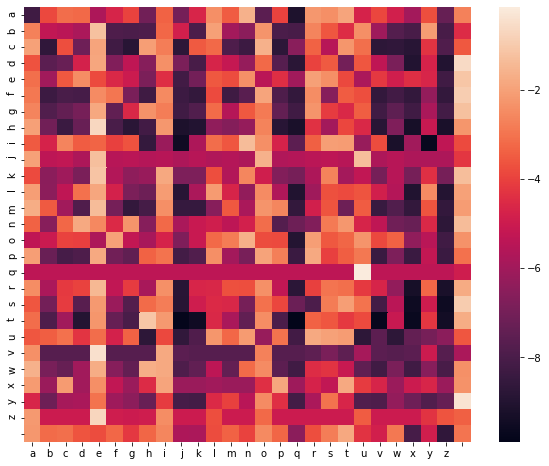

In [18]:
plt.subplots(figsize=(10,8))
sns.heatmap(probabilites, xticklabels=char_to_idx.keys(), yticklabels=char_to_idx.keys())

In [15]:
def predict(text, probabilities, char_to_idx):
    pb = 0
    for fc, sc in ngram(2, text):
        pb += probabilities[char_to_idx[fc]][char_to_idx[sc]]
    print(pb)

In [16]:
predict("yes", probabilites, char_to_idx)

-5.421759346590587


In [17]:
predict("gagan", probabilites, char_to_idx)

-10.888981769066623
